# Chapter 2. Supervised Learning methods.
# Part 4. Decision Trees.

## - Some datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## Forge dataset (artificial)

In [4]:
#taking datasets
X, y = mglearn.datasets.make_forge()
X.shape

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

Text(0, 0.5, 'Second feature')

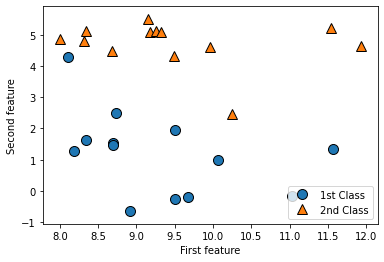

In [5]:
#building plot
#%matplotlib inline #allows to add plots to the browser inteface
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #plot building

plt.legend(["1st Class", "2nd Class"], loc=4) #legend
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave dataset (artificial)

In [6]:
#taking datasets
X, y = mglearn.datasets.make_wave(n_samples =40)
X.shape

(40, 1)

Text(0, 0.5, 'Target value')

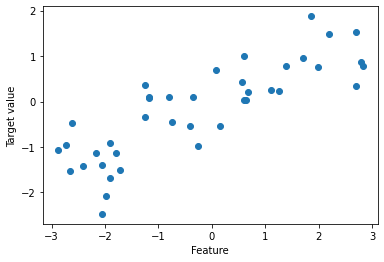

In [7]:
#building plot
plt.plot(X, y, 'o')

plt.xlabel("Feature")
plt.ylabel("Target value")

## Cancer dataset (natural)

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(cancer.keys())
print(cancer.data.shape)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
#building a hash table to examine dataset
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

## Boston Housing dataset (natural)

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

In [12]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


## Boston Housing extended dataset (natural)

In [13]:
X, y = mglearn.datasets.load_extended_boston()

#104 features are previous 13 default features...
#...plus 91 derivative features
X.shape

(506, 104)

## - Linear Regression. Elementary example

w[0]: 0.393906  b: -0.031804


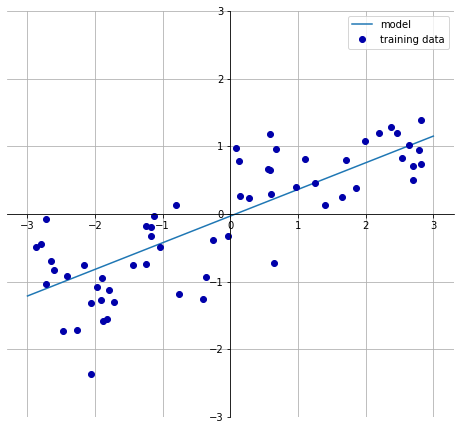

In [14]:
#calculating w and b for y=wx+b  where...
#...x and y are features and targets of dataset respectively
mglearn.plots.plot_linear_regression_wave()

## - Tree complexity control

Sklearn includes only pre-pruning strategy (early interrupt of learning)

Pre-pruning:

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#loading Dataset
cancer = load_breast_cancer()
#Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#model initialazing and building
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
#model validation
print('Train accuracy: {}'.format(tree.score(X_train, y_train)))
print('Test accuracy: {}'.format(tree.score(X_test, y_test)))

Train accuracy: 1.0
Test accuracy: 0.9230769230769231


^ 1.0 train accuracy tells that model have built a tree with clean leafs and possibly is overfitted

To prevent overfit there's a 'max_depth' param that limits depth layers for buiding tree by gain count

In [20]:
#model initializing and building
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
#model validation
print('Train accuracy: {}'.format(tree.score(X_train, y_train)))
print('Test accuracy: {}'.format(tree.score(X_test, y_test)))

Train accuracy: 0.9882629107981221
Test accuracy: 0.951048951048951


^ generalization ability increased

## - Decision Tree Analysis

Tree visualizing:

In [22]:
from sklearn.tree import export_graphviz

#writing describing file for built tree
export_graphviz(tree, out_file='tree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

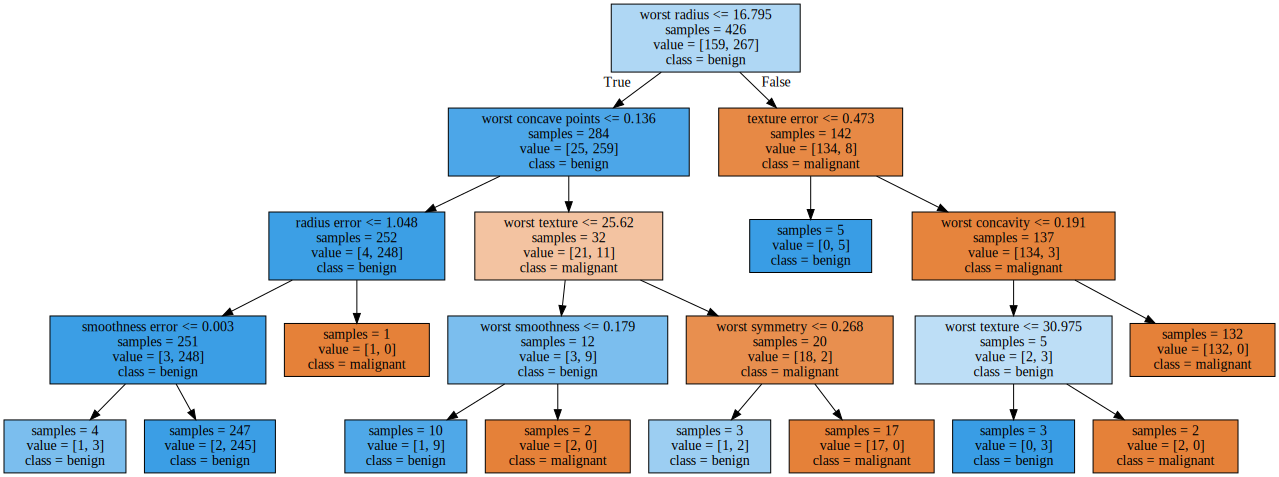

In [26]:
import graphviz

#rendering tree basing on wrote file
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Writing .pdf tree diagram:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

#loading dataset
cancer = load_breast_cancer()
#Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#model initializing and builidng
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

#getting tree data
dot_data = tree.export_graphviz(clf, out_file=None)
#building graph to export from gain data
graph = pydotplus.graph_from_dot_data(dot_data)
#writing .pdf
graph.write_pdf('cancer.pdf')

True

Also visualization could be done by 'Image' function of IPython

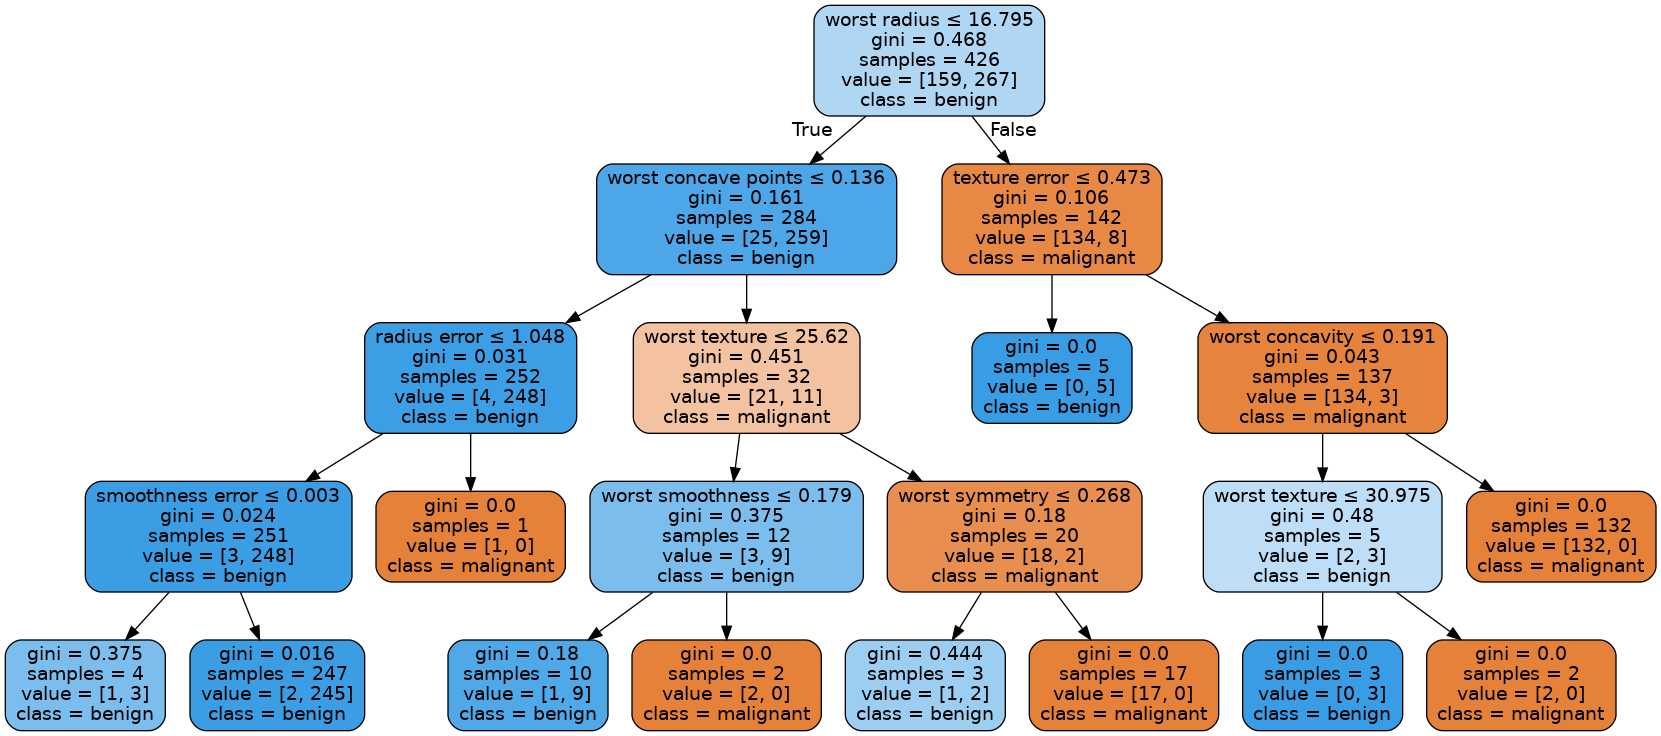

In [30]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())